## Week4 神经网络

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import math
import scipy.optimize as op

input_layer_size = 400
num_labels = 10
# 读入数据
data = sio.loadmat('data/ex3data1.mat')
X = data['X']
Y = data['y']

In [2]:
# 每个样本有400个特征(为20*20pixel的图片), 训练集中有5000个样本
print(X.shape)
print(Y.shape)

(5000, 400)
(5000, 1)


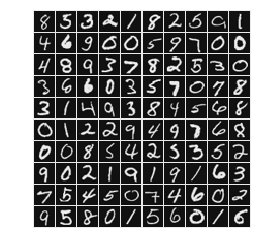

In [3]:
# 随机显示100个数据
def displayData(X, example_width=10):
    pad = 1    # 两个图片之间的边界
    digit_width = 20   # 每个手写数字图片为20*20
    n = X.shape[0]
    example_height = math.ceil(n/example_width)
    image = np.ones((pad+example_height*(digit_width+pad), pad+example_width*(digit_width+pad)))  #用来显示图片的数组
    for i in range(n):
        rows = i // example_width # 第几排数字
        cols = i - rows*example_width # 第几列数字
        image[pad+rows*(pad+digit_width):pad+rows*(pad+digit_width)+digit_width, pad+cols*(pad+digit_width):pad+cols*(pad+digit_width)+digit_width] \
                = X[i].reshape(digit_width, digit_width, order="F")   #order="F"表示按照列reshape, 这是因为matlab中是这样的
    plt.imshow(image,cmap='gray')   #显示该矩阵的灰度图像
    plt.axis('off')
    plt.show()
random_order = np.arange(X.shape[0])
np.random.shuffle(random_order)
displayData(X[random_order[:100]])

In [4]:
sigmoid = lambda x : 1/(1+np.exp(-x))
def costFunctionReg(theta, X, y, ld):
    # theta is (n,), X m*n, y m*1
    m, n = X.shape
    theta = theta.reshape(n,1)
    regCost = ld/(2.0*m)*np.dot(theta[1:].T, theta[1:])
    logisCost = -1.0/m*(np.dot(y.T, np.log(sigmoid(X.dot(theta)))) + np.dot((1.0-y).T, np.log(1.0-sigmoid(X.dot(theta)))))
    return logisCost+regCost
def gradientReg(theta, X, y, ld):
    m, n = X.shape
    theta = theta.reshape(n,1)
    res = (1.0/m)*np.dot(X.T, (sigmoid(X.dot(theta)) - y))
    res += ld/m*theta
    res[0] -= ld/m*theta[0]     # 因为theta0不需要正则化, 所以要将其减掉
    return res

In [5]:
# 检测上面两个函数是否正确
theta_t = np.array([-2, -1, 1, 2]).reshape(4,1)
X_t = np.c_[np.ones(5), np.arange(1, 16).reshape(5,3, order='F')/10]    #此处order='F'表示按照列优先重新排序, 因为octive中是这样的, 为了和题目中一致
print(X_t)
y_t = np.array([1, 0, 1, 0, 1]).reshape(5,1)
lambda_t = 3
print(costFunctionReg(theta_t, X_t, y_t, lambda_t))
print(gradientReg(theta_t, X_t, y_t, lambda_t))

[[1.  0.1 0.6 1.1]
 [1.  0.2 0.7 1.2]
 [1.  0.3 0.8 1.3]
 [1.  0.4 0.9 1.4]
 [1.  0.5 1.  1.5]]
[[2.5348194]]
[[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]]


In [40]:
Y[Y==10] = 0 # 将标志为10的数变成0
x = np.c_[np.ones(X.shape[0]), X]

In [42]:
# 返回一个n*k的矩阵, 每一列表示计算当前样本为数字k的概率所使用的逻辑回归模型参数
def oneVsAll(x, y, k):
    # k为总共有几类
    m, n = x.shape
    theta = np.zeros((n, k))
    for i in range(k):
        result = op.minimize(fun=costFunctionReg, x0=theta[:, i].flatten(), args=(x, y==i, 0.1), method='TNC', jac=gradientReg)
        theta[:, i] = result['x']
    return theta

In [43]:
theta = oneVsAll(x, Y, 10)

In [47]:
# 返回一个m维的向量, 表示每行样本为哪个数字的概率最大
def predictOneVsAll(theta, x):
    return x.dot(theta).argmax(axis = 1)

In [51]:
# 计算在训练集中的准确率
print('准确率为: ', (predictOneVsAll(theta, x) == Y.flatten()).sum() / len(Y))

准确率为:  0.9646
